In [2]:
! pip install pandas_datareader

In [3]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
     

In [4]:
df=pd.read_csv(r"Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
X=df.drop(['Weight','Species'],axis=1)
# Target feature weight
y=df['Weight']


0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [10]:
# Train test split
X_train,X_test , y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [14]:
rt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=5)
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [16]:
y_pred=rt.predict(X_test)
r2_score(y_test,y_pred)

0.940811392392028

In [18]:
# HyperParameter TUnning
param_grid={
    'max_depth':[x for x in range(11)],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'min_samples_split':[0.25,0.5,1.0],
}

In [20]:
reg=GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
reg.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [ ]:
# Feature importance
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)
     

Width 0.7062079269378089
Length3 0.2728978354821588
Length2 0.01033561224748227
Height 0.009876203523380577
Length1 0.0006824218091693925


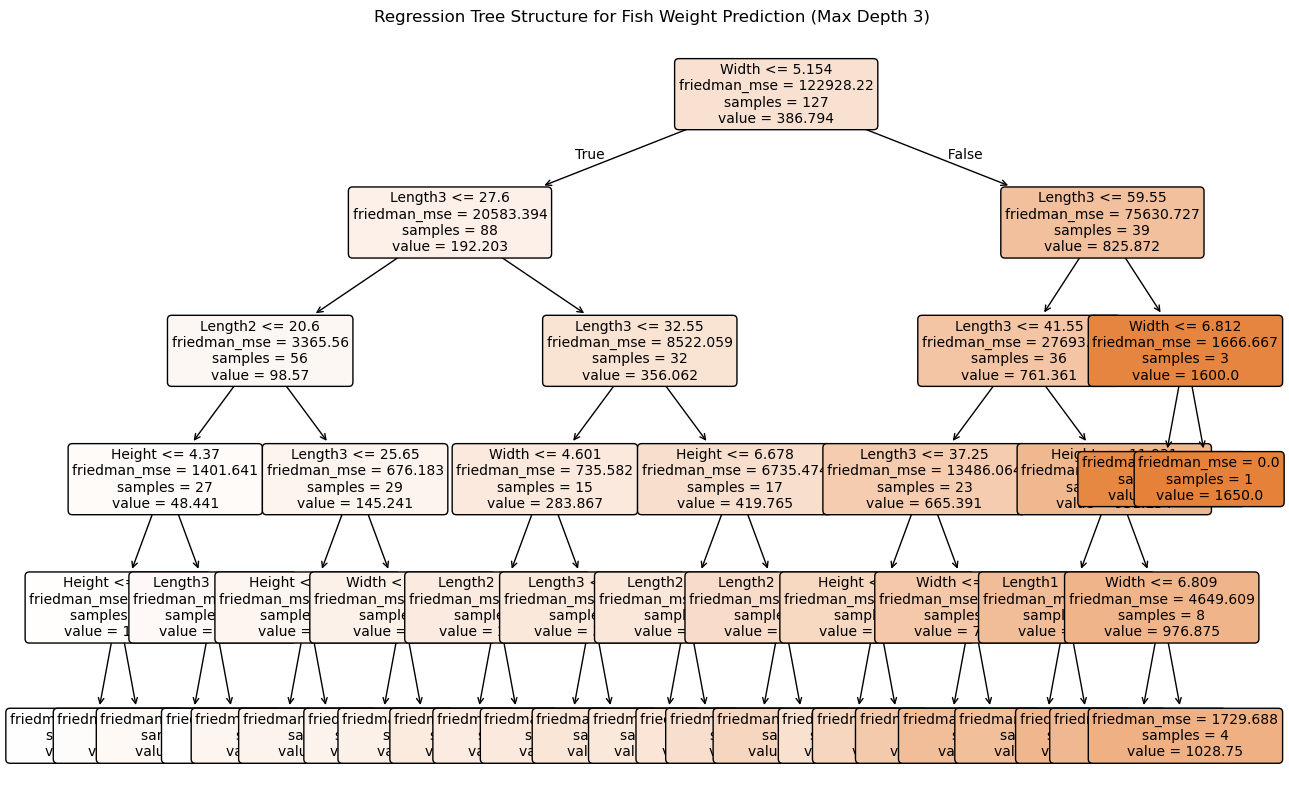

In [25]:
# plotting the graph
import matplotlib.pyplot as plt
from sklearn.tree import  plot_tree
plt.figure(figsize=(15, 10))

# Plot the tree structure
plot_tree(
    rt,
    feature_names=X.columns.tolist(), # List of feature names for clarity
    filled=True,                      # Color the nodes to show majority class/value
    rounded=True,                     # Use rounded boxes
    fontsize=10
)

plt.title("Regression Tree Structure for Fish Weight Prediction (Max Depth 3)")
plt.show()